In [1]:
#importing packages
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import tensorflow as tf

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud

Populating the interactive namespace from numpy and matplotlib


In [2]:
imageDirectory = "./image_data/train2014/"
question_file_path = './text_data/v2_OpenEnded_mscoco_train2014_questions.json'
annotation_file_path = './text_data/v2_mscoco_train2014_annotations.json'

In [3]:
with open(question_file_path, 'r') as f:
    questions = json.load(f)
    questions = questions["questions"]

with open(annotation_file_path, 'r') as f:
    annotations = json.load(f)
    annotations = annotations["annotations"]

In [4]:
print("Total Number Questions is : ",len(questions))


Total Number Questions is :  443757


In [5]:
questions_df = pd.DataFrame(questions)
questions_df.head()

,image_id,question,question_id
0,458752,What is this photo taken looking through?,458752000
1,458752,What position is this man playing?,458752001
2,458752,What color is the players shirt?,458752002
3,458752,Is this man a professional baseball player?,458752003
4,262146,What color is the snow?,262146000


In [6]:
annotations_df = pd.DataFrame(annotations)
annotations_df.head()

,answer_type,answers,image_id,multiple_choice_answer,question_id,question_type
0,other,"[{'answer': 'net', 'answer_confidence': 'maybe...",458752,net,458752000,what is this
1,other,"[{'answer': 'pitcher', 'answer_confidence': 'y...",458752,pitcher,458752001,what
2,other,"[{'answer': 'orange', 'answer_confidence': 'ye...",458752,orange,458752002,what color is the
3,yes/no,"[{'answer': 'yes', 'answer_confidence': 'yes',...",458752,yes,458752003,is this
4,other,"[{'answer': 'white', 'answer_confidence': 'yes...",262146,white,262146000,what color is the


In [7]:
data = pd.merge(questions_df, annotations_df, how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])
data.head()

,image_id,question,question_id,answer_type,answers,multiple_choice_answer,question_type
0,458752,What is this photo taken looking through?,458752000,other,"[{'answer': 'net', 'answer_confidence': 'maybe...",net,what is this
1,458752,What position is this man playing?,458752001,other,"[{'answer': 'pitcher', 'answer_confidence': 'y...",pitcher,what
2,458752,What color is the players shirt?,458752002,other,"[{'answer': 'orange', 'answer_confidence': 'ye...",orange,what color is the
3,458752,Is this man a professional baseball player?,458752003,yes/no,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes,is this
4,262146,What color is the snow?,262146000,other,"[{'answer': 'white', 'answer_confidence': 'yes...",white,what color is the


In [8]:
imagedir = "./image_data/train2014/"

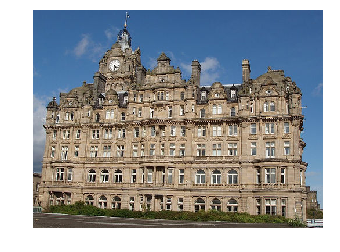

Question :  What time does the clock show?
Answer :  4:30
(375, 500, 3)


In [10]:
index = np.random.randint(0, len(data))

img_path =  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (data['image_id'][index])
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
print("Question : " ,data['question'][index])
print("Answer : ", data['multiple_choice_answer'][index])
print(img.shape)

In [11]:
data.answers[0]

[{'answer': 'net', 'answer_confidence': 'maybe', 'answer_id': 1},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 2},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 3},
 {'answer': 'netting', 'answer_confidence': 'yes', 'answer_id': 4},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 5},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 6},
 {'answer': 'mesh', 'answer_confidence': 'maybe', 'answer_id': 7},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 8},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 9},
 {'answer': 'net', 'answer_confidence': 'yes', 'answer_id': 10}]

In [12]:
def getPeopleAnswer(answers):
    answers_dict = {}
    score_dict = { 'yes' : 3, 'maybe' : 2, 'no' : 1 }
    for _answer in answers:
        score = score_dict[_answer['answer_confidence']]
        if answers_dict.get(_answer['answer'],-1) != -1 :
            answers_dict[_answer['answer']] += score
        else:
            answers_dict[_answer['answer']] = score

    return sorted(list(answers_dict.items()),key = lambda x: x[1],reverse=True)

In [13]:
data['derived_answer'] =  data["answers"].apply(lambda x: getPeopleAnswer(x))

In [14]:
data.head()

,image_id,question,question_id,answer_type,answers,multiple_choice_answer,question_type,derived_answer
0,458752,What is this photo taken looking through?,458752000,other,"[{'answer': 'net', 'answer_confidence': 'maybe...",net,what is this,"[(net, 23), (netting, 3), (mesh, 2)]"
1,458752,What position is this man playing?,458752001,other,"[{'answer': 'pitcher', 'answer_confidence': 'y...",pitcher,what,"[(pitcher, 27), (catcher, 1)]"
2,458752,What color is the players shirt?,458752002,other,"[{'answer': 'orange', 'answer_confidence': 'ye...",orange,what color is the,"[(orange, 29)]"
3,458752,Is this man a professional baseball player?,458752003,yes/no,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes,is this,"[(yes, 24), (no, 2)]"
4,262146,What color is the snow?,262146000,other,"[{'answer': 'white', 'answer_confidence': 'yes...",white,what color is the,"[(white, 30)]"


In [16]:
data.to_csv('./image_text_data.csv')